# Лабораторная работа №4
Найти стационарные точки системы, описываемой автономной системой обыкновенных дифференциальных уравнений:

$
\begin{cases}
   \dot{x} = - z\\
   \dot{y} = x- y \\
   \dot{z} = 3.1 x + y^2 + 0.5 z \\
 \end{cases}
$

Исследовать их устойчивость. Построить фазовый портрет. Построить сечение Пуанкаре (одностороннее и двустороннее) аттрактора динамической системы. Построить график расхождения двух близлежащих на аттракторе траекторий (решить систему с двумя близкими начальными условиями и построить график нормы разности между решениями в зависимости от времени). Найти спектр показателей Ляпунова аттрактора.

## 1. Устойчивость стационарных точек

Для начала найдем стационарные точки, занулив в системе производные по времени:

$
\begin{cases}
   -z = 0\\
   x - y = 0\\
   3.1 x + y^2 + 0.5 z = 0\\
 \end{cases}
 $

Решениями этой системы являются 2 точки: 

$ (x_s, y_s, z_s)^{(1)} = (0, 0, 0), \ (x_s, y_s, z_s)^{(2)} = (-3.1, -3.1, 0)$

Выпишем Якобиан системы:

$
J = 
\begin{pmatrix}
  0 & 0 & -1 \\
  1 & -1 & 0 \\
  3.1 & 2y & 0.5 \\
\end{pmatrix}
$

При подстановке $(x_s, y_s, z_s)^{(1)}$ собственные значения матрицы: $ \lambda_1, \lambda_2, \lambda_3 = -1, 0.25 + 0.45\sqrt{15}i, 0.25 - 0.45\sqrt{15}i$

При подстановке $(x_s, y_s, z_s)^{(2)}$ собственные значения матрицы: $ \lambda_1, \lambda_2, \lambda_3 \approx 0.835, -0.667 + 1.808i, -0.667 - 1.808i$

Так как имеются положительные вещественные части, обе стационарные точки неустойчивы.

## 2. Фазовый портрет и сечение Пуанкаре

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def system(t, xyz):
    x, y, z = xyz
    dxdt = -z
    dydt = x - y
    dzdt = 3.1 * x + y**2 + 0.5 * z
    return [dxdt, dydt, dzdt]

In [3]:
t_span_short = (0, 100)
t_eval_short = np.arange(0, 100.001, 0.001)
initial_conditions = [1, 1, 1]

solution_short = solve_ivp(system, t_span_short, initial_conditions, t_eval=t_eval_short)

In [4]:
final_point = solution_short.y[:, -1]
print(final_point)

t_span_long = (0, 2000)
t_eval_long = np.arange(0, 2000.001, 0.001)

solution_long = solve_ivp(system, t_span_long, final_point, t_eval=t_eval_long)

[ 0.42644963 -0.65923991 -3.14885789]


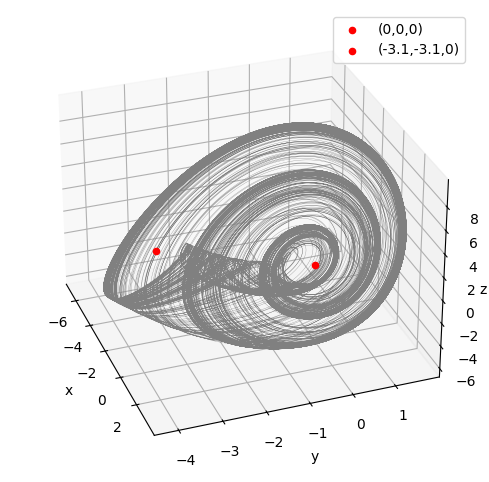

In [34]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution_long.y[0], solution_long.y[1], solution_long.y[2], color='grey', linewidth=0.2)
stationary_points = [(0, 0, 0), (-3.1, -3.1, 0)]
for point in stationary_points:
    ax.scatter(point[0], point[1], point[2], color='red', marker='o', s=20, label=f'({point[0]},{point[1]},{point[2]})')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, -20)
ax.legend()
ax.zaxis.labelpad=-4.5
plt.show()

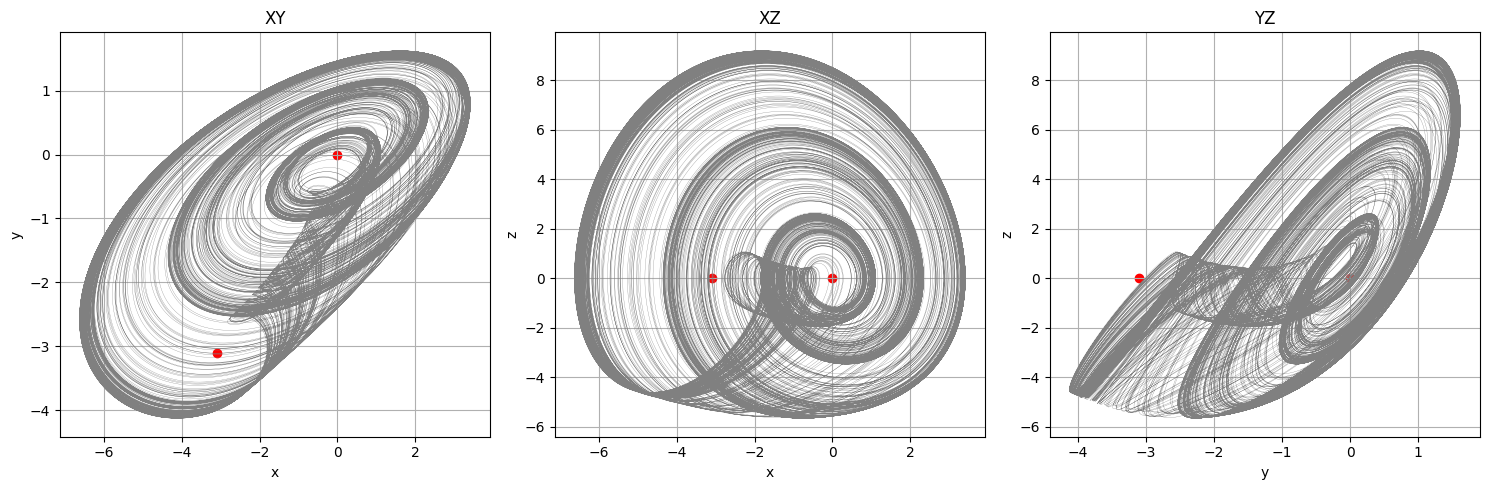

In [77]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131)
ax1.plot(solution_long.y[0], solution_long.y[1], color='grey', linewidth=0.2)
ax1.scatter(stationary_points[0][0], stationary_points[0][1], color='red', marker='o')
ax1.scatter(stationary_points[1][0], stationary_points[1][1], color='red', marker='o')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('XY')
ax1.grid(True)

ax2 = fig.add_subplot(132)
ax2.plot(solution_long.y[0], solution_long.y[2], color='grey', linewidth=0.2)
ax2.scatter(stationary_points[0][0], stationary_points[0][2], color='red', marker='o')
ax2.scatter(stationary_points[1][0], stationary_points[1][2], color='red', marker='o')
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('XZ')
ax2.grid(True)

ax3 = fig.add_subplot(133)
ax3.plot(solution_long.y[1], solution_long.y[2], color='grey', linewidth=0.2)
ax3.scatter(stationary_points[0][1], stationary_points[0][2], color='red', marker='o')
ax3.scatter(stationary_points[1][1], stationary_points[1][2], color='red', marker='o')
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_title('YZ')
ax3.grid(True)

plt.tight_layout()

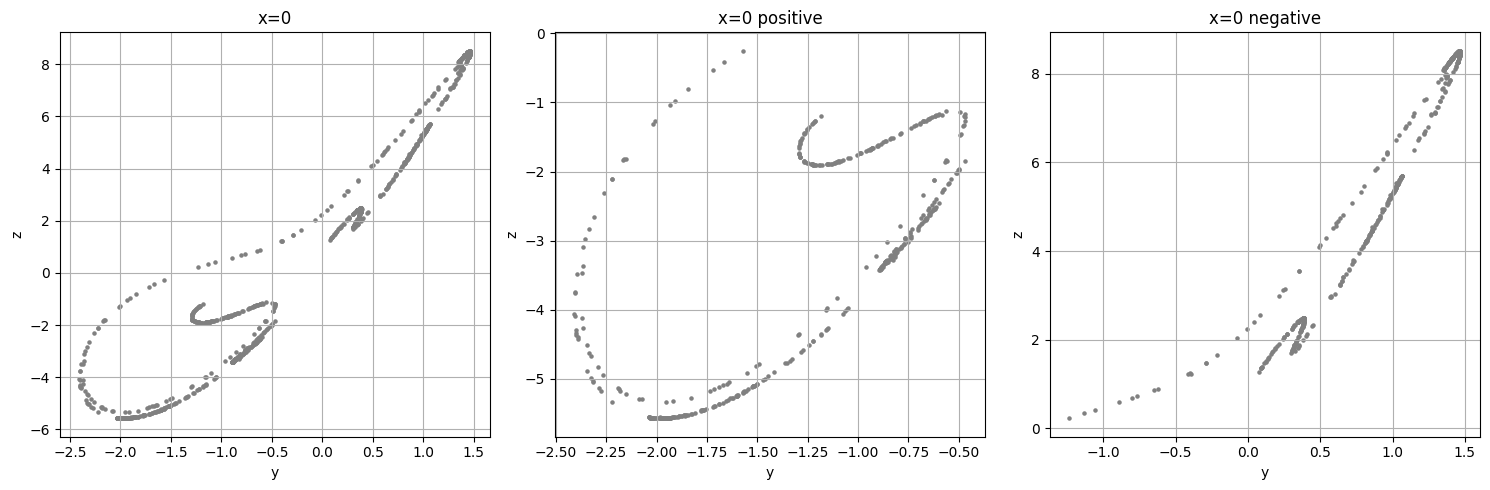

In [78]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

crossings = []
for i in range(len(solution_long.t) - 1):
    if solution_long.y[0][i] * solution_long.y[0][i+1] < 0:
        crossings.append(i)

x_crossings = []
y_crossings = []
z_crossings = []
for crossing in crossings:
    t1, t2 = solution_long.t[crossing], solution_long.t[crossing+1]
    x1, x2 = solution_long.y[0][crossing], solution_long.y[0][crossing+1]
    y1, y2 = solution_long.y[1][crossing], solution_long.y[1][crossing+1]
    z1, z2 = solution_long.y[2][crossing], solution_long.y[2][crossing+1]

    t_interp = (0 - x1) * (t2 - t1) / (x2 - x1) + t1
    x_interp = 0
    y_interp = (y2 - y1) / (x2 - x1) * (x_interp - x1) + y1
    z_interp = (z2 - z1) / (x2 - x1) * (x_interp - x1) + z1

    x_crossings.append(x_interp)
    y_crossings.append(y_interp)
    z_crossings.append(z_interp)

ax1.scatter(y_crossings, z_crossings, color='grey', s=5)
ax1.set_xlabel('y')
ax1.set_ylabel('z')
ax1.set_title('x=0')
ax1.grid(True)

crossings_x0_positive = []
for i in range(len(solution_long.t) - 1):
    if solution_long.y[0][i] < 0 and solution_long.y[0][i+1] >= 0:
        crossings_x0_positive.append(i)

y_crossings_x0_positive = []
z_crossings_x0_positive = []
for crossing in crossings_x0_positive:
    t1, t2 = solution_long.t[crossing], solution_long.t[crossing+1]
    x1, x2 = solution_long.y[0][crossing], solution_long.y[0][crossing+1]
    y1, y2 = solution_long.y[1][crossing], solution_long.y[1][crossing+1]
    z1, z2 = solution_long.y[2][crossing], solution_long.y[2][crossing+1]

    t_interp = (0 - x1) * (t2 - t1) / (x2 - x1) + t1
    y_interp = (y2 - y1) / (x2 - x1) * (0 - x1) + y1
    z_interp = (z2 - z1) / (x2 - x1) * (0 - x1) + z1

    y_crossings_x0_positive.append(y_interp)
    z_crossings_x0_positive.append(z_interp)

ax2.scatter(y_crossings_x0_positive, z_crossings_x0_positive, color='grey', s=5)
ax2.set_xlabel('y')
ax2.set_ylabel('z')
ax2.set_title('x=0 positive')
ax2.grid(True)

crossings_x0_negative = []
for i in range(len(solution_long.t) - 1):
    if solution_long.y[0][i] > 0 and solution_long.y[0][i+1] <= 0:
        crossings_x0_negative.append(i)

y_crossings_x0_negative = []
z_crossings_x0_negative = []
for crossing in crossings_x0_negative:
    t1, t2 = solution_long.t[crossing], solution_long.t[crossing+1]
    x1, x2 = solution_long.y[0][crossing], solution_long.y[0][crossing+1]
    y1, y2 = solution_long.y[1][crossing], solution_long.y[1][crossing+1]
    z1, z2 = solution_long.y[2][crossing], solution_long.y[2][crossing+1]

    t_interp = (0 - x1) * (t2 - t1) / (x2 - x1) + t1
    y_interp = (y2 - y1) / (x2 - x1) * (0 - x1) + y1
    z_interp = (z2 - z1) / (x2 - x1) * (0 - x1) + z1

    y_crossings_x0_negative.append(y_interp)
    z_crossings_x0_negative.append(z_interp)

ax3.scatter(y_crossings_x0_negative, z_crossings_x0_negative, color='grey', s=5)
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_title('x=0 negative')
ax3.grid(True)

plt.tight_layout()

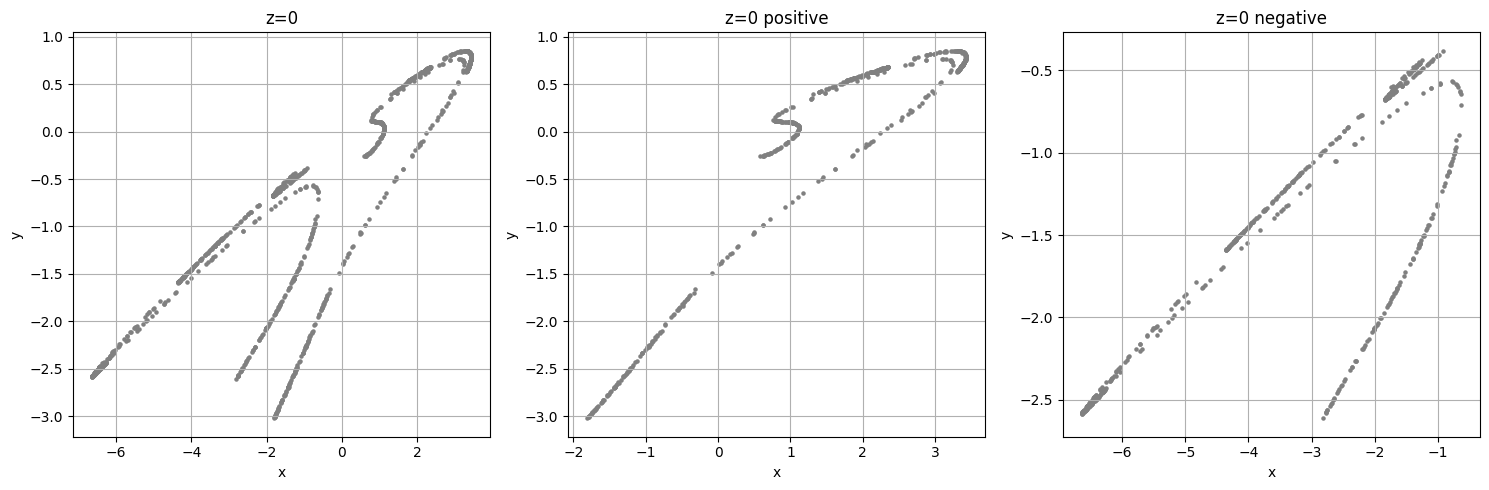

In [80]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

crossings_z0 = []
for i in range(len(solution_long.t) - 1):
    if solution_long.y[2][i] * solution_long.y[2][i+1] < 0:
        crossings_z0.append(i)

x_crossings_z0 = []
y_crossings_z0 = []
for crossing in crossings_z0:
    t1, t2 = solution_long.t[crossing], solution_long.t[crossing+1]
    x1, x2 = solution_long.y[0][crossing], solution_long.y[0][crossing+1]
    y1, y2 = solution_long.y[1][crossing], solution_long.y[1][crossing+1]
    z1, z2 = solution_long.y[2][crossing], solution_long.y[2][crossing+1]

    t_interp = (0 - z1) * (t2 - t1) / (z2 - z1) + t1
    x_interp = (x2 - x1) / (z2 - z1) * (0 - z1) + x1
    y_interp = (y2 - y1) / (z2 - z1) * (0 - z1) + y1

    x_crossings_z0.append(x_interp)
    y_crossings_z0.append(y_interp)

ax1.scatter(x_crossings_z0, y_crossings_z0, color='grey', s=5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('z=0')
ax1.grid(True)

crossings_z0_positive = []
for i in range(len(solution_long.t) - 1):
    if solution_long.y[2][i] < 0 and solution_long.y[2][i+1] >= 0:
        crossings_z0_positive.append(i)

x_crossings_z0_positive = []
y_crossings_z0_positive = []
for crossing in crossings_z0_positive:
    t1, t2 = solution_long.t[crossing], solution_long.t[crossing+1]
    x1, x2 = solution_long.y[0][crossing], solution_long.y[0][crossing+1]
    y1, y2 = solution_long.y[1][crossing], solution_long.y[1][crossing+1]
    z1, z2 = solution_long.y[2][crossing], solution_long.y[2][crossing+1]

    t_interp = (0 - z1) * (t2 - t1) / (z2 - z1) + t1
    x_interp = (x2 - x1) / (z2 - z1) * (0 - z1) + x1
    y_interp = (y2 - y1) / (z2 - z1) * (0 - z1) + y1

    x_crossings_z0_positive.append(x_interp)
    y_crossings_z0_positive.append(y_interp)

ax2.scatter(x_crossings_z0_positive, y_crossings_z0_positive, color='grey', s=5)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('z=0 positive')
ax2.grid(True)

crossings_z0_negative = []
for i in range(len(solution_long.t) - 1):
    if solution_long.y[2][i] > 0 and solution_long.y[2][i+1] <= 0:
        crossings_z0_negative.append(i)

x_crossings_z0_negative = []
y_crossings_z0_negative = []
for crossing in crossings_z0_negative:
    t1, t2 = solution_long.t[crossing], solution_long.t[crossing+1]
    x1, x2 = solution_long.y[0][crossing], solution_long.y[0][crossing+1]
    y1, y2 = solution_long.y[1][crossing], solution_long.y[1][crossing+1]
    z1, z2 = solution_long.y[2][crossing], solution_long.y[2][crossing+1]

    t_interp = (0 - z1) * (t2 - t1) / (z2 - z1) + t1
    x_interp = (x2 - x1) / (z2 - z1) * (0 - z1) + x1
    y_interp = (y2 - y1) / (z2 - z1) * (0 - z1) + y1

    x_crossings_z0_negative.append(x_interp)
    y_crossings_z0_negative.append(y_interp)

ax3.scatter(x_crossings_z0_negative, y_crossings_z0_negative, color='grey', s=5)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('z=0 negative')
ax3.grid(True)

plt.tight_layout()

## 3. Показатели Ляпунова

In [81]:
def system_with_variations(t, xyz):
    x, y, z = xyz[0], xyz[1], xyz[2]
    x1, y1, z1 = xyz[3], xyz[4], xyz[5]
    x2, y2, z2 = xyz[6], xyz[7], xyz[8]
    x3, y3, z3 = xyz[9], xyz[10], xyz[11]
    dxdt = -z
    dydt = x - y
    dzdt = 3.1 * x + y**2 + 0.5 * z
    dx1dt = -z1
    dy1dt = x1 - y1
    dz1dt = 3.1 * x1 + 2 * y * y1 + 0.5 * z1
    dx2dt = -z2
    dy2dt = x2 - y2
    dz2dt = 3.1 * x2 + 2 * y * y2 + 0.5 * z2
    dx3dt = -z3
    dy3dt = x3 - y3
    dz3dt = 3.1 * x3 + 2 * y * y3 + 0.5 * z3
    return [dxdt, dydt, dzdt, dx1dt, dy1dt, dz1dt, dx2dt, dy2dt, dz2dt, dx3dt, dy3dt, dz3dt]

In [82]:
def gram_schmidt(vectors):

    u1 = vectors[0:3]
    u2 = vectors[3:6] - np.dot(vectors[3:6], u1) / np.dot(u1, u1) * u1
    u3 = vectors[6:9] - np.dot(vectors[6:9], u1) / np.dot(u1, u1) * u1
    u3 = u3 - np.dot(vectors[6:9], u2) / np.dot(u2, u2) * u2
    return np.hstack([u1, u2, u3])

def norm(vectors):
    u1 = vectors[0:3]
    u2 = vectors[3:6]
    u3 = vectors[6:9]

    u1 = u1 / (u1[0]**2 + u1[1]**2 + u1[2]**2)**0.5
    u2 = u2 / (u2[0]**2 + u2[1]**2 + u2[2]**2)**0.5
    u3 = u3 / (u3[0]**2 + u3[1]**2 + u3[2]**2)**0.5

    return np.hstack([u1, u2, u3])

In [83]:
M = 10000
arr = np.array([1, 0, 0, 0, 1, 0, 0, 0, 1])
initial_point = np.hstack([final_point, arr])
S1, S2, S3 = [], [], []

t_span_long = (0, 1)
t_eval_long = np.arange(0, 1.001, 0.001)

for i in range(M):
    solution_long = solve_ivp(system_with_variations, t_span_long, initial_point, t_eval=t_eval_long)

    vector = solution_long.y[3:12, -1]
    vector = gram_schmidt(vector)

    S1 += [np.log((vector[0]**2 + vector[1]**2 + vector[2]**2 + 1e-10)**0.5)]
    S2 += [np.log((vector[3]**2 + vector[4]**2 + vector[5]**2 + 1e-10)**0.5)]
    S3 += [np.log((vector[6]**2 + vector[7]**2 + vector[8]**2 + 1e-10)**0.5)]

    vector = norm(vector)

    initial_point = np.hstack([solution_long.y[:3, -1], vector])

In [84]:
lambda1 = sum(S1) / M
lambda2 = sum(S2) / M
lambda3 = sum(S3) / M
print(lambda1, lambda2, lambda3)

0.10628579924679533 -4.1464475628007345e-05 -0.6062670375600444


$div{f} = \displaystyle \frac{\partial \dot{x}}{\partial x} + \frac{\partial \dot{y}}{\partial y} + \frac{\partial \dot{z}}{\partial z} = -0.5 \approx \lambda_1 + \lambda_2 + \lambda_3$

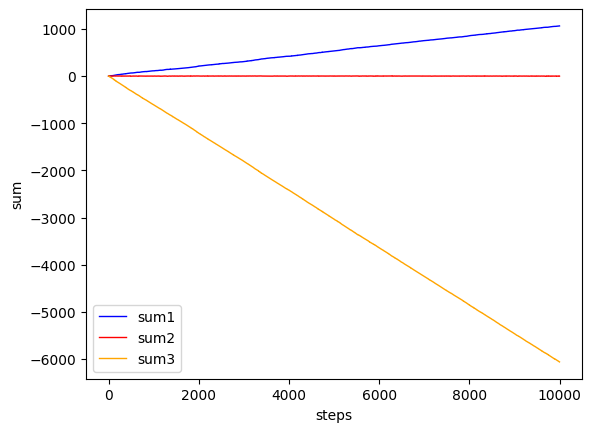

In [92]:
G1, G2, G3 = [S1[0]], [S2[0]], [S3[0]]

for i in range(len(S1) - 1):
    G1 += [G1[i] + S1[i + 1]]
    G2 += [G2[i] + S2[i + 1]]
    G3 += [G3[i] + S3[i + 1]]

plt.plot(np.arange(0, M), G1, color='blue', label='sum1', linewidth=1)
plt.plot(np.arange(0, M), G2, color='red', label='sum2', linewidth=1)
plt.plot(np.arange(0, M), G3, color='orange', label='sum3', linewidth=1)
plt.xlabel('steps')
plt.ylabel('sum')
plt.legend()
plt.show()

## 4. График расхождения близлежащих траекторий

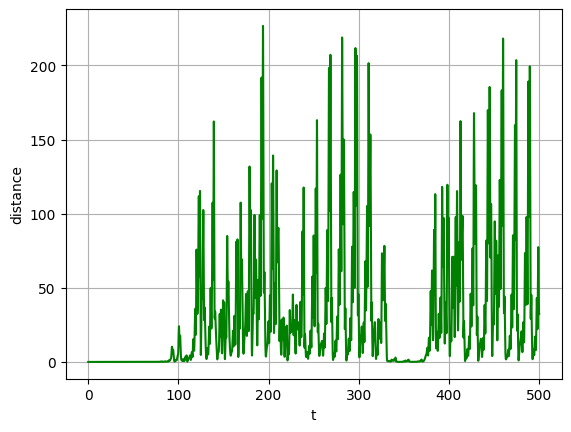

In [132]:
initial_point_1 = [-1, 0, 1] #[-3.1, -3.1, 0] #[0, 0, 0]
initial_point_2 = [-1 + 1e-5, 0, 1] #[-3.1 + 1e-7, -3.1, 0] #[0 + 1e-6, 0, 0]

t_end = 500
t_step = 0.001
t = (0, 500)
t_interval = np.arange(0, t_end + t_step, t_step)

solution_1 = solve_ivp(system, t, initial_point_1, t_eval=t_interval)
solution_2 = solve_ivp(system, t, initial_point_2, t_eval=t_interval)

solutions_distances = np.sum((solution_1.y - solution_2.y)**2, axis=0)

plt.plot(t_interval, solutions_distances, color = 'green')
plt.xlabel('t')
plt.ylabel('distance')
plt.grid(True)